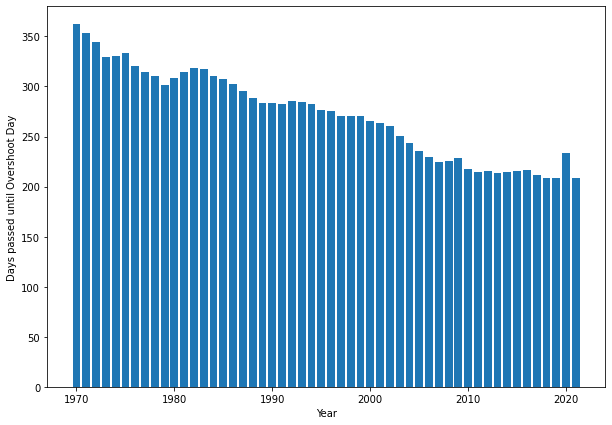

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("../data/overshoot.csv")

year = data['Year']
fullDate = data['DaysPassed']

fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(year, fullDate)
plt.xlabel("Year")
plt.ylabel("Days passed until Overshoot Day")
# Show Plot
plt.show()

Root mean squared error:  1895.6553254437872
R2 score:  0.0


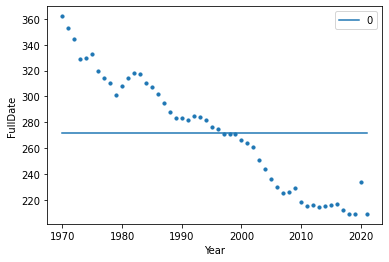

Root mean squared error:  73.41274299252709
R2 score:  0.9612731586764907


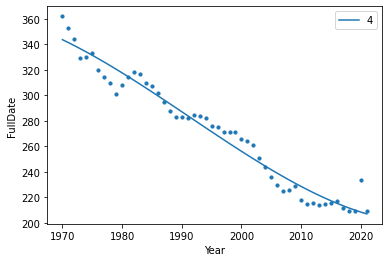

Root mean squared error:  72.99955862941933
R2 score:  0.9614911225423696


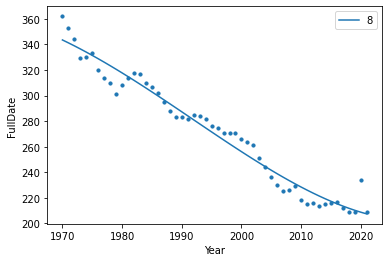

Root mean squared error:  72.57405187561324
R2 score:  0.9617155867411588


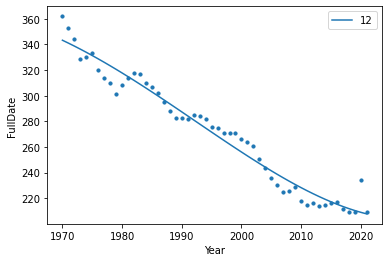

Root mean squared error:  72.13949494833808
R2 score:  0.9619448251060885


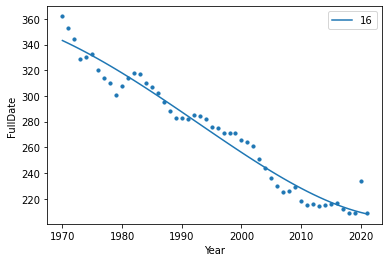

Root mean squared error:  71.69910072826973
R2 score:  0.9621771427717302


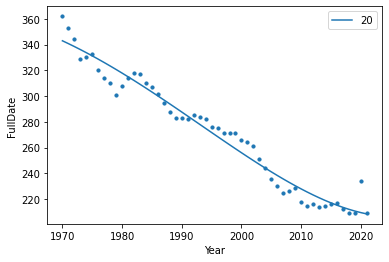

Root mean squared error:  71.2560050519473
R2 score:  0.9624108855151368


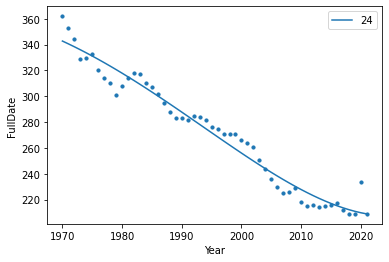

Root mean squared error:  70.81325035796762
R2 score:  0.9626444483828358


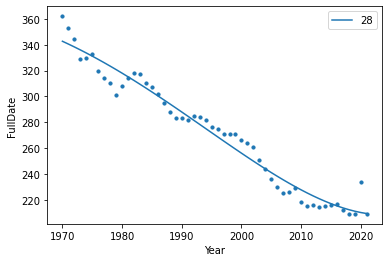

Root mean squared error:  70.37377078684264
R2 score:  0.9628762835509839


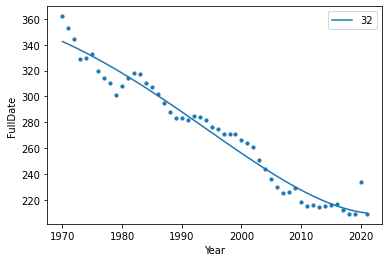

Root mean squared error:  69.94037880362056
R2 score:  0.9631049073822283


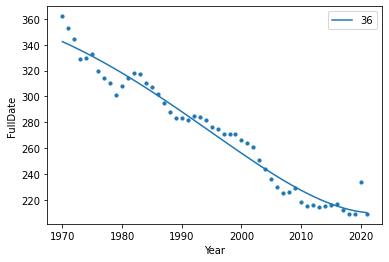

Root mean squared error:  69.5157534128286
R2 score:  0.9633289066425857


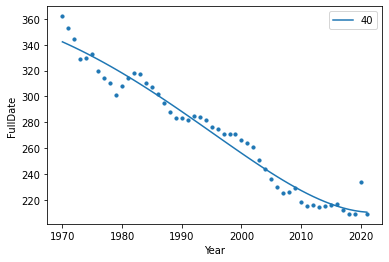

Root mean squared error:  69.10243000594149
R2 score:  0.9635469438571255


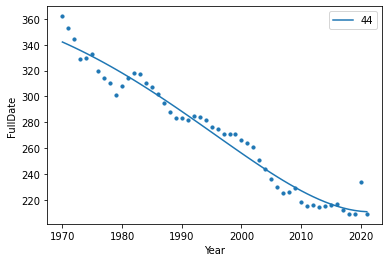

Root mean squared error:  68.70279186787856
R2 score:  0.9637577617904802


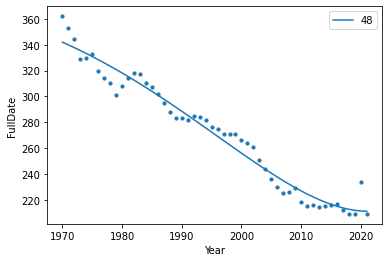

Root mean squared error:  68.31906337584736
R2 score:  0.963960187034606


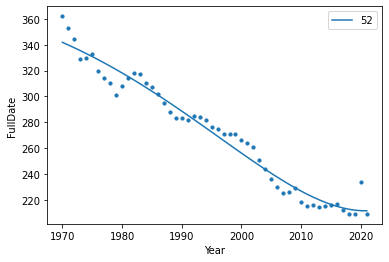

Root mean squared error:  67.95330487874129
R2 score:  0.9641531327100126


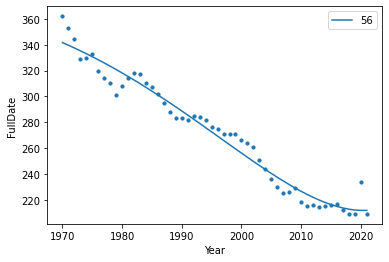

Root mean squared error:  67.6074092536283
R2 score:  0.9643356002822924


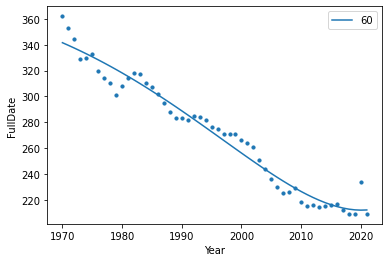

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# sckit-learn implementation
year = np.array(year)
year = year.reshape(-1,1)
fullDate = list(fullDate)

for deg in range(0,62,4):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(year)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, fullDate)
    y_predicted = regression_model.predict(X_poly)

    # model evaluation
    rmse = mean_squared_error(fullDate, y_predicted)
    r2 = r2_score(fullDate, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(year, fullDate, s=10)
    plt.xlabel('Year')
    plt.ylabel('FullDate')
    # predicted values
    plt.plot(year, y_predicted, label = deg)
    plt.legend()
    plt.show()

Root mean squared error:  4977.867233560089
R2 score:  -101.65760432171766


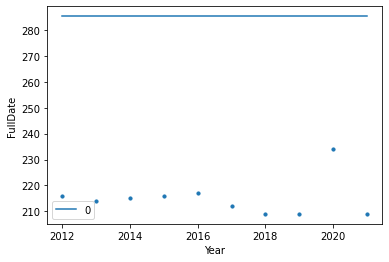

Root mean squared error:  3754.021621053459
R2 score:  -76.41847022176654


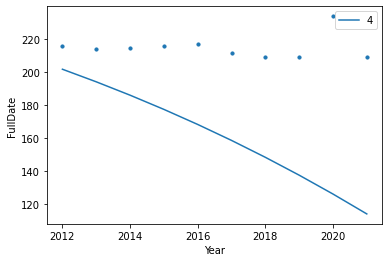

Root mean squared error:  3894.740470814955
R2 score:  -79.32048815869159


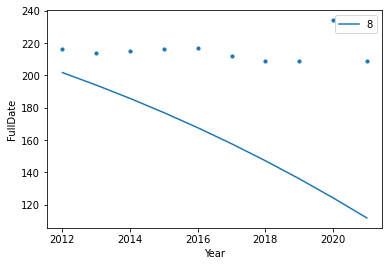

Root mean squared error:  4039.3091436687973
R2 score:  -82.30190026126618


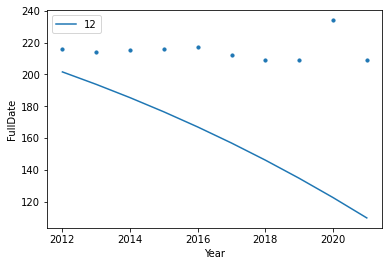

Root mean squared error:  4187.924673335829
R2 score:  -85.36676991824767


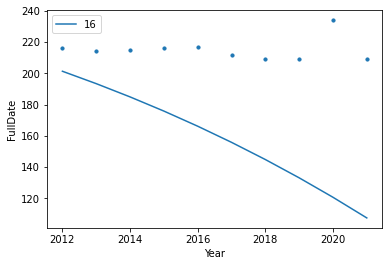

Root mean squared error:  4340.806310203997
R2 score:  -88.51961868847178


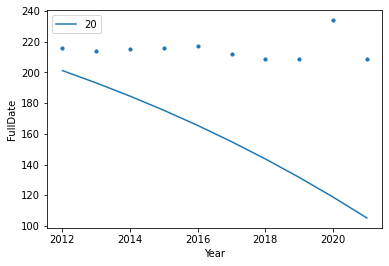

Root mean squared error:  4498.1976079792485
R2 score:  -91.76546933345531


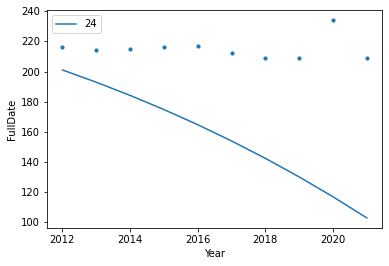

Root mean squared error:  4660.368585617614
R2 score:  -95.10989040250804


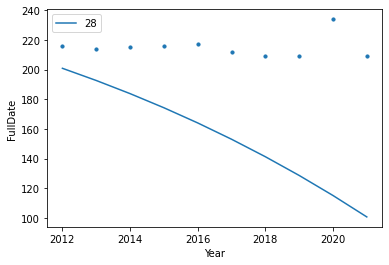

Root mean squared error:  4827.618071125265
R2 score:  -98.55904456847318


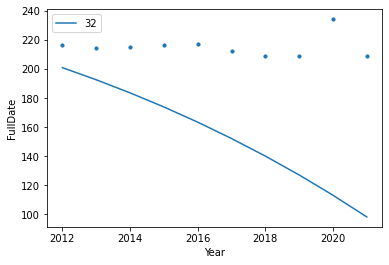

Root mean squared error:  5000.276208979145
R2 score:  -102.11974033778398


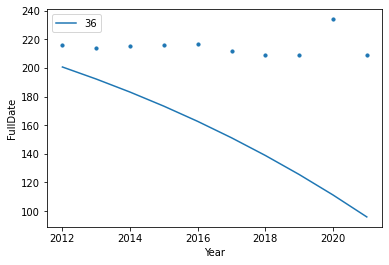

Root mean squared error:  5178.70722471926
R2 score:  -105.79948906412167


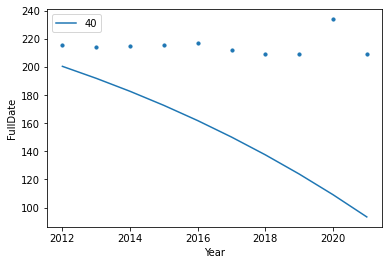

Root mean squared error:  5363.3123164564795
R2 score:  -109.60656457942832


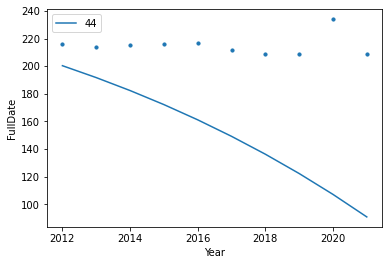

Root mean squared error:  5554.532900188445
R2 score:  -113.55007012143628


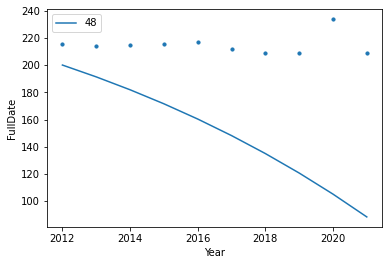

Root mean squared error:  5752.854081123522
R2 score:  -117.64000992211841


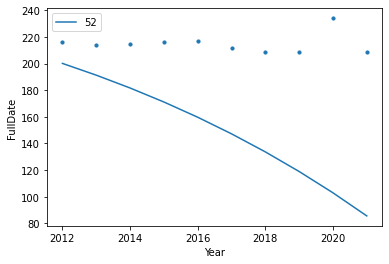

Root mean squared error:  5958.808401723351
R2 score:  -121.8873665028532


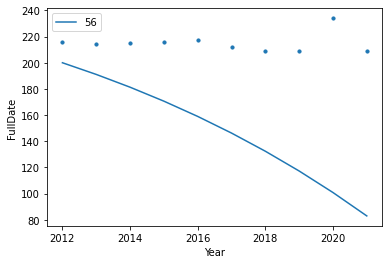

Root mean squared error:  6172.979894506689
R2 score:  -126.3041842546234


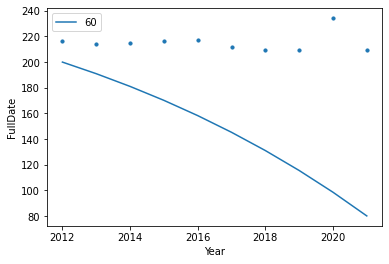

In [3]:
#checking multiple models for linear regression

tYear = year[:-10]
tFullDate = fullDate[:-10]

testYear = year[len(year)-10:len(year)]
testFullDate = fullDate[len(fullDate)-10:len(fullDate)]

for deg in range(0,62,4):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(tYear)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, tFullDate)
    y_predicted = regression_model.predict(poly.fit_transform(testYear))

    # model evaluation
    rmse = mean_squared_error(testFullDate, y_predicted)
    r2 = r2_score(testFullDate, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(testYear, testFullDate, s=10)
    plt.xlabel('Year')
    plt.ylabel('FullDate')
    # predicted values
    plt.plot(testYear, y_predicted, label = deg)
    plt.legend()
    plt.show()

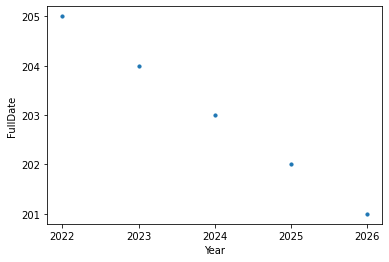

,Year,DaysPassed
0,2022,205.0
1,2023,204.0
2,2024,203.0
3,2025,202.0
4,2026,201.0


In [4]:
#training model from all values and predicting next 5 values

poly = PolynomialFeatures(degree = 4)

future = list(range(2022,2027))
future = np.array(future)
future = future.reshape(-1,1)
X_poly = poly.fit_transform(year)
regression_model = LinearRegression()
regression_model.fit(X_poly, fullDate)
y_predicted = regression_model.predict(poly.fit_transform(future))

for i in range(len(y_predicted)):
    y_predicted[i] = int(y_predicted[i])

plt.scatter(future,y_predicted,s = 10)
plt.locator_params(integer=True)
plt.xlabel('Year')
plt.ylabel('FullDate')
plt.show()

future = future.flatten()
nuData = {"Year" : future,"DaysPassed" : y_predicted}
df = pd.DataFrame(nuData)
df

[216, 214, 215, 216, 217, 212, 209, 209, 234, 209]
Root mean squared error:  47.4836243865614
R2 score:  0.020754291883658404


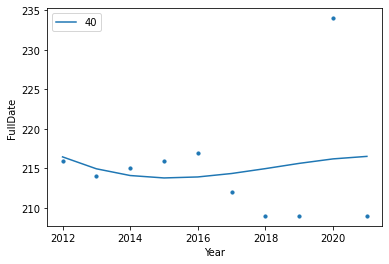

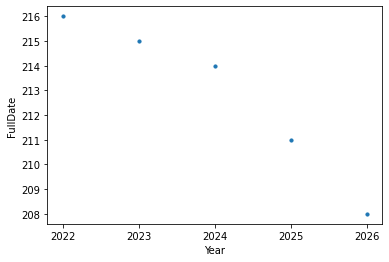

,Year,DaysPassed
0,2022,216.0
1,2023,215.0
2,2024,214.0
3,2025,211.0
4,2026,208.0


In [5]:
#training model from last 10 years and then predicting next 5 years

tYear = year[-10:]
tFullDate = fullDate[-10:]
print(tFullDate)

future = future.reshape(-1,1)
poly = PolynomialFeatures(degree = 40)
X_poly = poly.fit_transform(tYear)
regression_model = LinearRegression()
regression_model.fit(X_poly, tFullDate)

y_predicted = regression_model.predict(X_poly)

# model evaluation
rmse = mean_squared_error(tFullDate, y_predicted)
r2 = r2_score(tFullDate, y_predicted)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(tYear, tFullDate, s=10)
plt.xlabel('Year')
plt.ylabel('FullDate')
# predicted values
plt.plot(tYear, y_predicted, label = "40")
plt.legend()
plt.show()

y_predicted = regression_model.predict(poly.fit_transform(future))

for i in range(len(y_predicted)):
    y_predicted[i] = int(y_predicted[i])

plt.scatter(future,y_predicted,s = 10)
plt.locator_params(integer=True)
plt.xlabel('Year')
plt.ylabel('FullDate')
plt.show()

future = future.flatten()
nuData = {"Year" : future,"DaysPassed" : y_predicted}
df = pd.DataFrame(nuData)
df

[[2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]]
[216, 214, 215, 216, 217, 212, 209, 209, 234, 209]
[array([2012]), array([2013]), array([2014]), array([2015]), array([2016]), array([2017]), array([2018]), array([2019]), array([2021])]
[216, 214, 215, 216, 217, 212, 209, 209, 209]
Root mean squared error:  3.0884022295791382
R2 score:  0.68414068106577


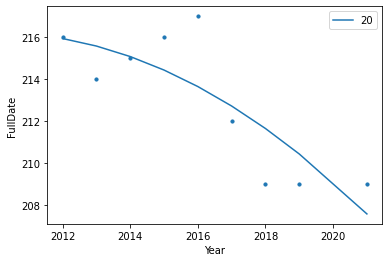

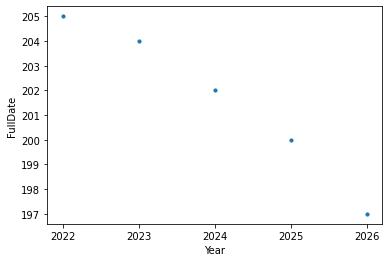

,Year,DaysPassed
0,2022,205.0
1,2023,204.0
2,2024,202.0
3,2025,200.0
4,2026,197.0


In [6]:
#training model from last 10 years except 2020's outlier and then predicting next 5 years

tYear = year[-10:]
tFullDate = fullDate[-10:]
print(tYear)
print(tFullDate)

tYear = list(tYear)
tFullDate = list(tFullDate)

tempYear = tYear[len(tYear)-1]
tempDate = tFullDate[len(tFullDate)-1]

tYear.pop()
tYear.pop()
tFullDate.pop()
tFullDate.pop()

tYear.append(tempYear)
tFullDate.append(tempDate)

print(tYear)
print(tFullDate)

future = future.reshape(-1,1)
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(tYear)
regression_model = LinearRegression()
regression_model.fit(X_poly, tFullDate)

y_predicted = regression_model.predict(X_poly)

# model evaluation
rmse = mean_squared_error(tFullDate, y_predicted)
r2 = r2_score(tFullDate, y_predicted)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(tYear, tFullDate, s=10)
plt.xlabel('Year')
plt.ylabel('FullDate')
# predicted values
plt.plot(tYear, y_predicted, label = "20")
plt.legend()
plt.show()

y_predicted = regression_model.predict(poly.fit_transform(future))

for i in range(len(y_predicted)):
    y_predicted[i] = int(y_predicted[i])

plt.scatter(future,y_predicted,s = 10)
plt.locator_params(integer=True)
plt.xlabel('Year')
plt.ylabel('FullDate')
plt.show()

future = future.flatten()
nuData = {"Year" : future,"DaysPassed" : y_predicted}
df = pd.DataFrame(nuData)
df

In [7]:
print(year)
print(fullDate)

[[1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]]
[362, 353, 344, 329, 330, 333, 320, 314, 310, 301, 308, 314, 318, 317, 310, 307, 302, 295, 288, 283, 283, 282, 285, 284, 282, 276, 275, 271, 271, 271, 266, 264, 261, 251, 244, 236, 230, 225, 226, 229, 218, 215, 216, 214, 215, 216, 217, 212, 209, 209, 234, 209]


[array([1970]), array([1971]), array([1972]), array([1973]), array([1974]), array([1975]), array([1976]), array([1977]), array([1978]), array([1979]), array([1980]), array([1981]), array([1982]), array([1983]), array([1984]), array([1985]), array([1986]), array([1987]), array([1988]), array([1989]), array([1990]), array([1991]), array([1992]), array([1993]), array([1994]), array([1995]), array([1996]), array([1997]), array([1998]), array([1999]), array([2000]), array([2001]), array([2002]), array([2003]), array([2004]), array([2005]), array([2006]), array([2007]), array([2008]), array([2009]), array([2010]), array([2011]), array([2012]), array([2013]), array([2014]), array([2015]), array([2016]), array([2017]), array([2018]), array([2019]), array([2021])]
[362, 353, 344, 329, 330, 333, 320, 314, 310, 301, 308, 314, 318, 317, 310, 307, 302, 295, 288, 283, 283, 282, 285, 284, 282, 276, 275, 271, 271, 271, 266, 264, 261, 251, 244, 236, 230, 225, 226, 229, 218, 215, 216, 214, 215, 216, 217

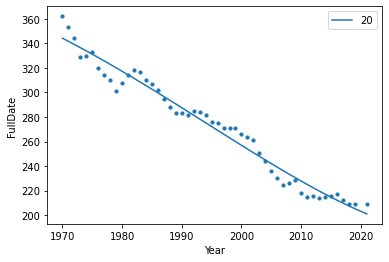

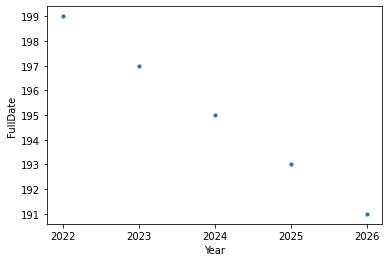

,Year,DaysPassed
0,2022,199.0
1,2023,197.0
2,2024,195.0
3,2025,193.0
4,2026,191.0


In [8]:
#predicting next 5 years overshoot day by removinf 2020's outlier

tYear = year
tFullDate = fullDate

tYear = list(tYear)
tFullDate = list(tFullDate)

tempYear = tYear[len(tYear)-1]
tempDate = tFullDate[len(tFullDate)-1]

tYear.pop()
tYear.pop()
tFullDate.pop()
tFullDate.pop()

tYear.append(tempYear)
tFullDate.append(tempDate)

print(tYear)
print(tFullDate)

future = future.reshape(-1,1)
poly = PolynomialFeatures(degree = 20)
X_poly = poly.fit_transform(tYear)
regression_model = LinearRegression()
regression_model.fit(X_poly, tFullDate)

y_predicted = regression_model.predict(X_poly)

# model evaluation
rmse = mean_squared_error(tFullDate, y_predicted)
r2 = r2_score(tFullDate, y_predicted)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(tYear, tFullDate, s=10)
plt.xlabel('Year')
plt.ylabel('FullDate')
# predicted values
plt.plot(tYear, y_predicted, label = "20")
plt.legend()
plt.show()

y_predicted = regression_model.predict(poly.fit_transform(future))

for i in range(len(y_predicted)):
    y_predicted[i] = int(y_predicted[i])

plt.scatter(future,y_predicted,s = 10)
plt.locator_params(integer=True)
plt.xlabel('Year')
plt.ylabel('FullDate')
plt.show()

future = future.flatten()
nuData = {"Year" : future,"DaysPassed" : y_predicted}
df = pd.DataFrame(nuData)
df

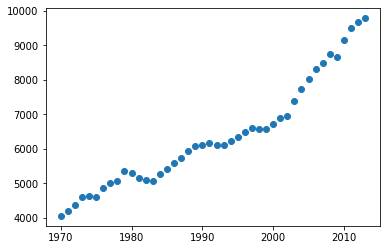

In [15]:
#AIR POLLUTION DATA ANALYSIS STARTED 

data = pd.read_csv("../data/EST.csv")
YEAR = data['Year']
tot = data['Total']
gas = data['Gas']
liquid = data['Liquids']
solid = data['Solids']

pyear = []
pgas = []
pliquid = []
psolid = []
ptot = []

for i in range(1970-1751,263):
    pyear.append(YEAR[i])
    pgas.append(gas[i])
    pliquid.append(liquid[i])
    psolid.append(solid[i])
    ptot.append(tot[i])
    
pyear = np.array(pyear)
pgas = np.array(pgas)
pliquid = np.array(pliquid)
psolid = np.array(psolid)
ptot = np.array(ptot)

pyear = pyear.reshape(-1,1)
plt.scatter(pyear,ptot)
plt.show()

Root mean squared error:  2392665.4271694217
R2 score:  0.0


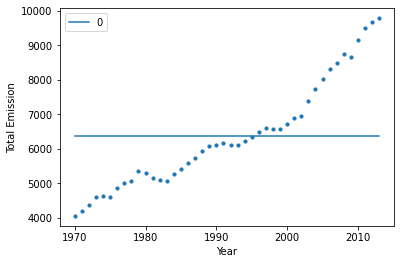

Root mean squared error:  171489.2569783461
R2 score:  0.9283271053984251


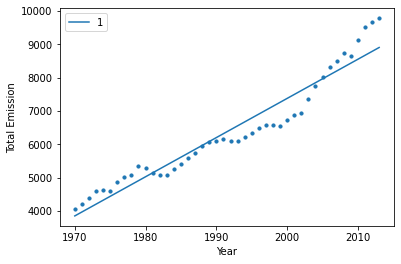

Root mean squared error:  62943.69518703695
R2 score:  0.973693064449257


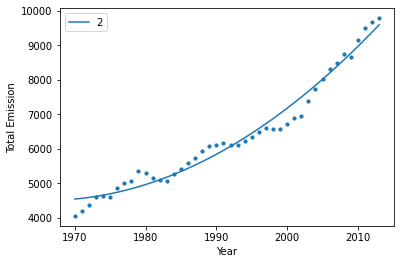

Root mean squared error:  25877.83662846602
R2 score:  0.9891845151709823


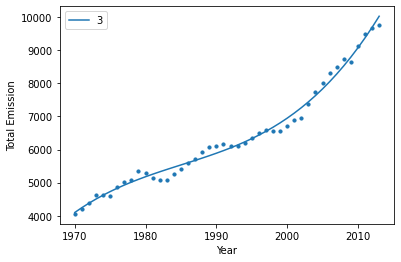

Root mean squared error:  25901.340494563825
R2 score:  0.9891746918727347


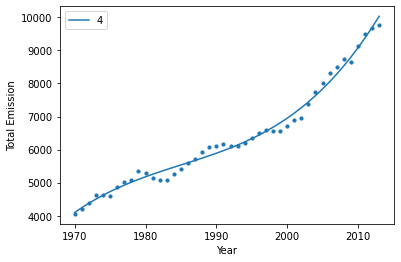

Root mean squared error:  25926.195401670077
R2 score:  0.9891643039150938


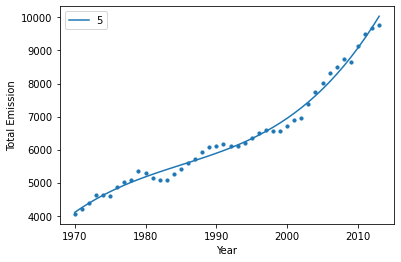

Root mean squared error:  25952.375425101174
R2 score:  0.9891533621331239


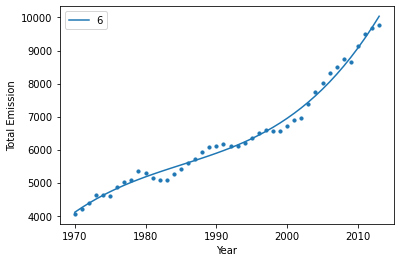

Root mean squared error:  25979.85588995238
R2 score:  0.9891418768395517


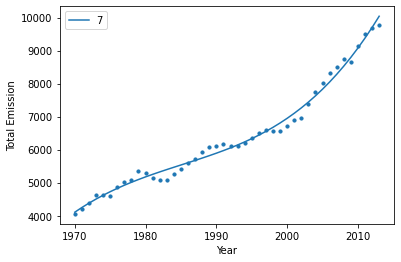

Root mean squared error:  26008.612467776613
R2 score:  0.9891298582023039


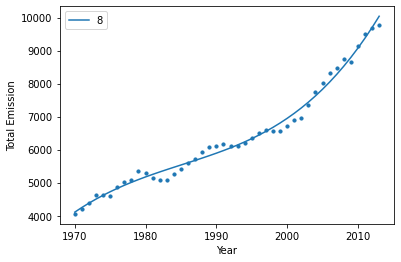

Root mean squared error:  26038.621251126737
R2 score:  0.9891173162133533


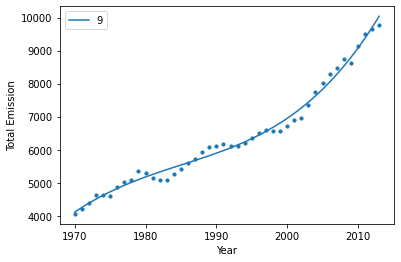

Root mean squared error:  26069.858656366963
R2 score:  0.9891042607293372


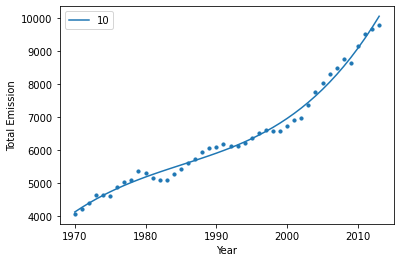

Root mean squared error:  26102.301477239736
R2 score:  0.9890907014491703


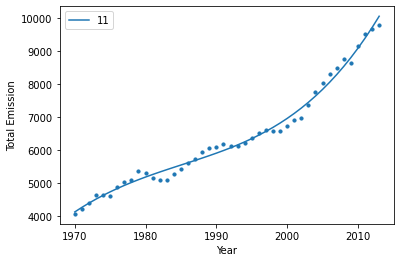

Root mean squared error:  26135.926882147054
R2 score:  0.9890766479151804


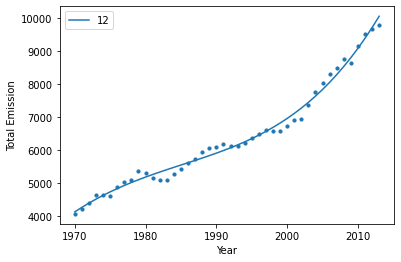

Root mean squared error:  26170.712389649838
R2 score:  0.9890621095233485


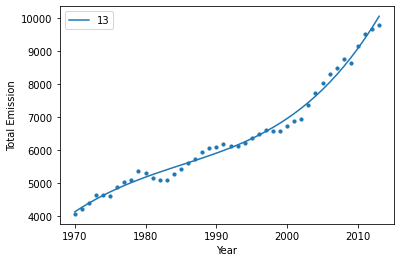

Root mean squared error:  26206.635883907464
R2 score:  0.9890470955168561


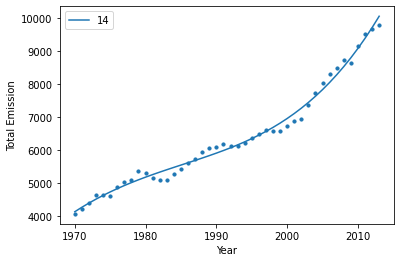

Root mean squared error:  26243.675617575554
R2 score:  0.9890316149848738


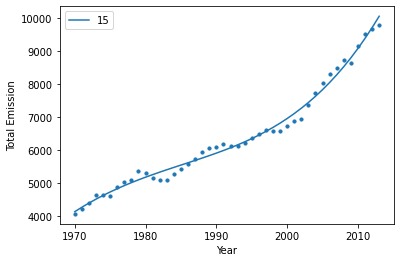

Root mean squared error:  26281.81019763936
R2 score:  0.9890156768684825


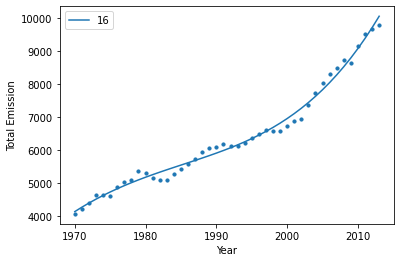

Root mean squared error:  26321.01859769441
R2 score:  0.9889992899555402


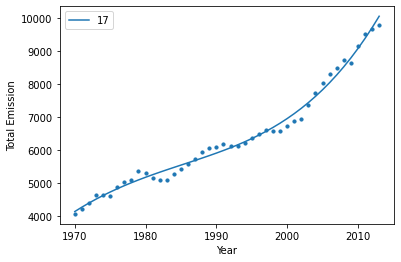

Root mean squared error:  26361.280140605293
R2 score:  0.9889824628879302


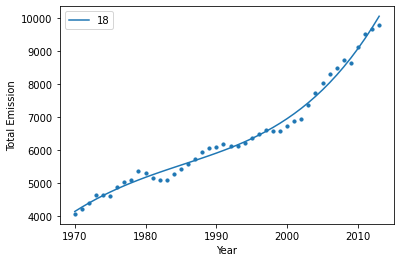

Root mean squared error:  26402.57451683453
R2 score:  0.9889652041539007


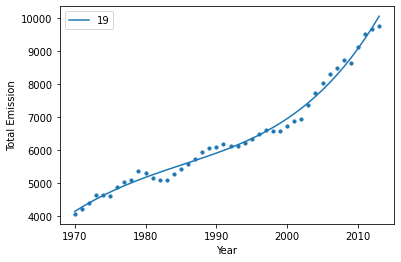

Root mean squared error:  26444.88176345684
R2 score:  0.988947522096835


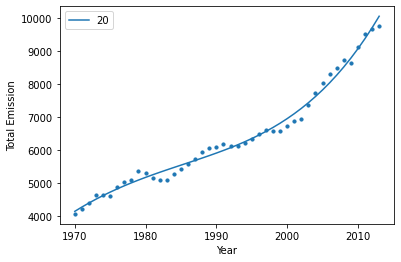

In [17]:
#training all models[total air pollution] for all values

for deg in range(0,21):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(pyear)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, ptot)
    y_predicted = regression_model.predict(X_poly)

    # model evaluation
    rmse = mean_squared_error(ptot, y_predicted)
    r2 = r2_score(ptot, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(pyear, ptot, s=10)
    plt.xlabel('Year')
    plt.ylabel('Total Emission')
    # predicted values
    plt.plot(pyear, y_predicted, label = deg)
    plt.legend()
    plt.show()

Root mean squared error:  11399389.647205783
R2 score:  -65.47082175399642


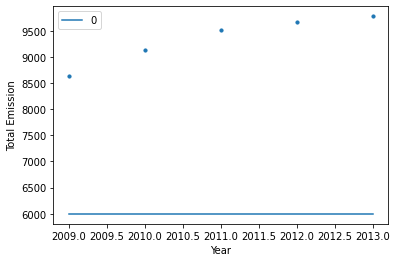

Root mean squared error:  1309697.9445793903
R2 score:  -6.636961391792713


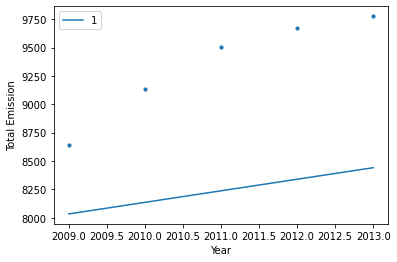

Root mean squared error:  328598.4956105654
R2 score:  -0.9160860981460728


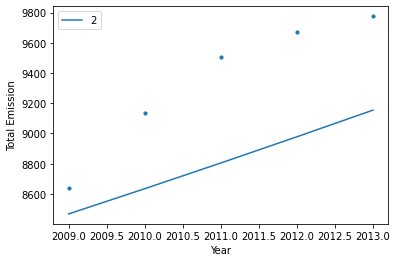

Root mean squared error:  172371.37108666621
R2 score:  -0.005112294393960326


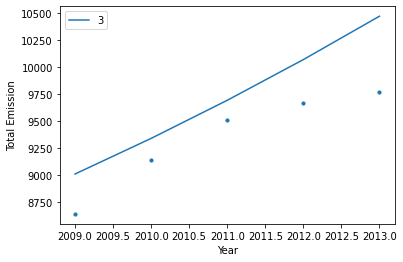

Root mean squared error:  178113.56204953018
R2 score:  -0.03859550391505073


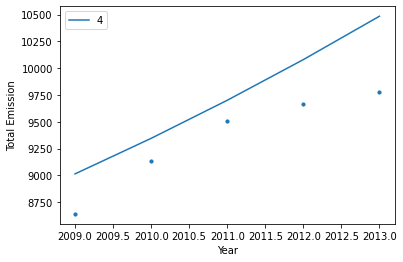

Root mean squared error:  183937.99161809558
R2 score:  -0.07255825382120151


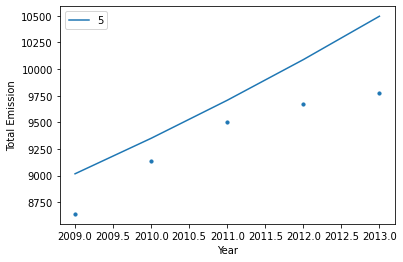

Root mean squared error:  189875.9149274264
R2 score:  -0.10718279549393728


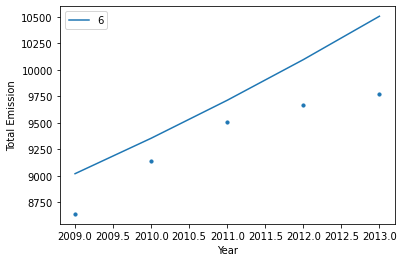

Root mean squared error:  195928.01000295184
R2 score:  -0.14247308255786795


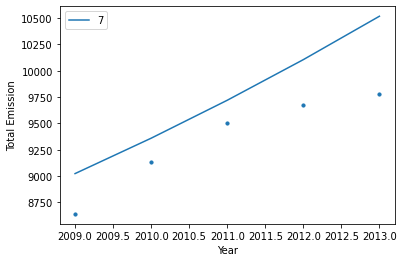

Root mean squared error:  202094.9824739187
R2 score:  -0.1784332295978388


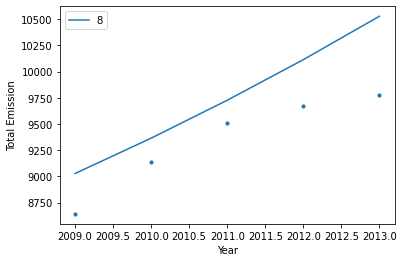

Root mean squared error:  208377.54869521246
R2 score:  -0.21506741374081706


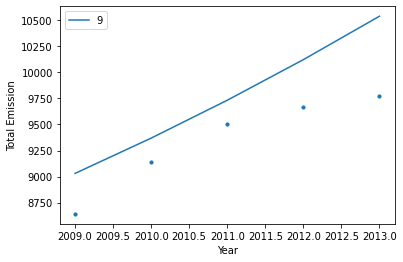

Root mean squared error:  214776.44336278006
R2 score:  -0.25237991906207724


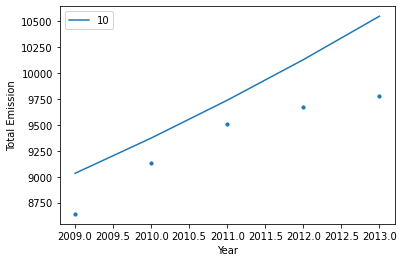

Root mean squared error:  221292.40982275043
R2 score:  -0.2903750800768492


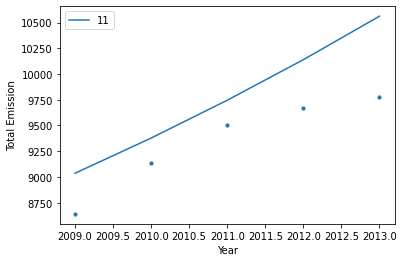

Root mean squared error:  227926.20953869316
R2 score:  -0.3290573369447183


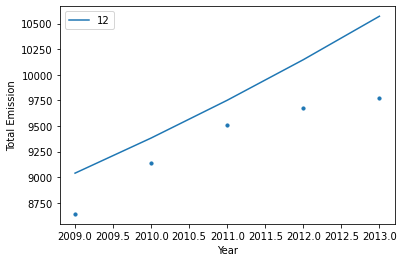

Root mean squared error:  234678.61747026266
R2 score:  -0.3684312085221011


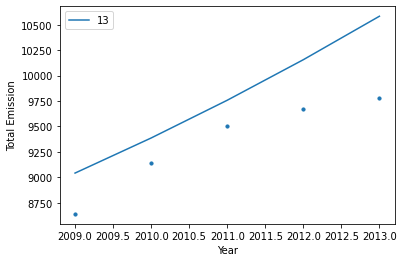

Root mean squared error:  241550.42184665837
R2 score:  -0.4085012910412733


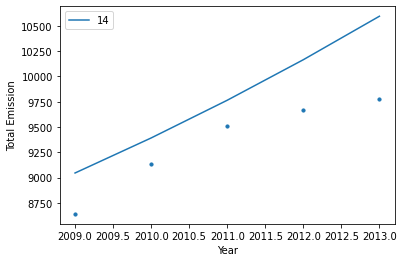

Root mean squared error:  248542.42778748152
R2 score:  -0.4492722792238961


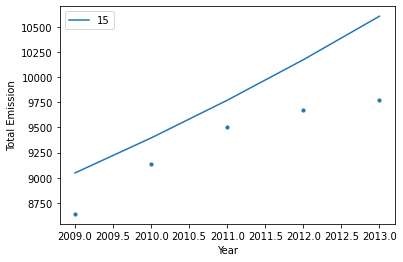

Root mean squared error:  255655.4534461004
R2 score:  -0.4907489437926482


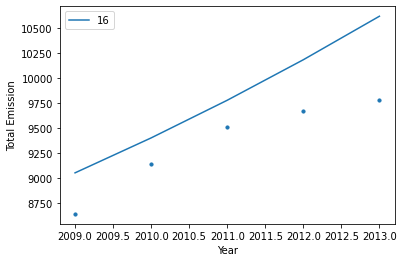

Root mean squared error:  262890.3337629094
R2 score:  -0.5329361533568011


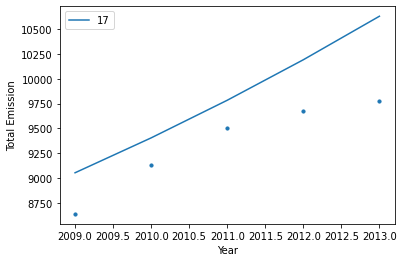

Root mean squared error:  270247.9193121113
R2 score:  -0.5758388676877091


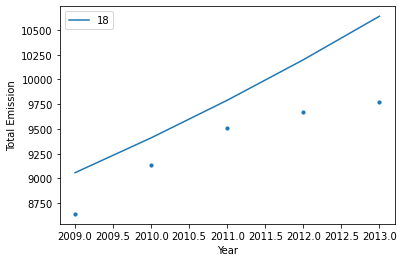

Root mean squared error:  277729.07536276453
R2 score:  -0.6194621322436931


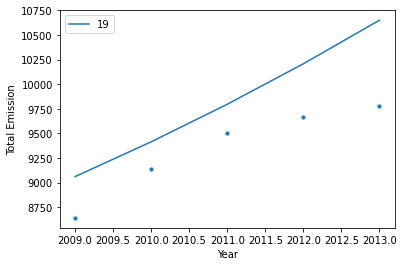

Root mean squared error:  285334.68429965584
R2 score:  -0.6638110922863585


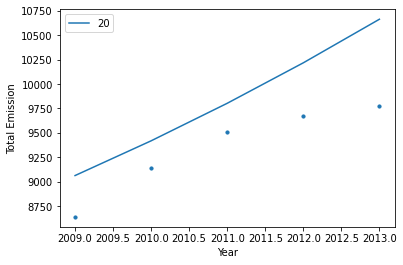

In [19]:
#training all models[total air pollution] for all values except last 5 values and testing for last 5 values

tYear = pyear[:-5]
tTot = ptot[:-5]

testYear = pyear[len(pyear)-5:len(pyear)]
testTot = ptot[len(ptot)-5:len(ptot)]

for deg in range(0,21):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(tYear)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, tTot)
    y_predicted = regression_model.predict(poly.fit_transform(testYear))

    # model evaluation
    rmse = mean_squared_error(testTot, y_predicted)
    r2 = r2_score(testTot, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(testYear, testTot, s=10)
    plt.xlabel('Year')
    plt.ylabel('Total Emission')
    # predicted values
    plt.plot(testYear, y_predicted, label = deg)
    plt.legend()
    plt.show()

Root mean squared error:  172371.37108666621
R2 score:  -0.005112294393960326


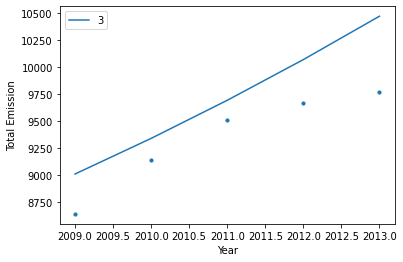

,Year,Total
0,2009,9011.264879
1,2010,9341.426466
2,2011,9694.660811
3,2012,10071.915229
4,2013,10474.137033


In [20]:
#training best(deg = 3) model[total air pollution] for all values except last 5 values and testing for last 5 values


tYear = pyear[:-5]
tTot = ptot[:-5]

testYear = pyear[len(pyear)-5:len(pyear)]
testTot = ptot[len(ptot)-5:len(ptot)]

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(tYear)
regression_model = LinearRegression()
regression_model.fit(X_poly, tTot)
y_predicted = regression_model.predict(poly.fit_transform(testYear))

# model evaluation
rmse = mean_squared_error(testTot, y_predicted)
r2 = r2_score(testTot, y_predicted)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(testYear, testTot, s=10)
plt.xlabel('Year')
plt.ylabel('Total Emission')
# predicted values
plt.plot(testYear, y_predicted, label = "3")
plt.legend()
plt.show()


testYear = testYear.flatten()
nuData = {"Year" : testYear,"Total" : y_predicted}
df = pd.DataFrame(nuData)
df

In [32]:
#predicting total pollution for the year 2014-2021


future = list(range(2014,2022))
future = np.array(future)
future = future.reshape(-1,1)

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(pyear)
regression_model = LinearRegression()
regression_model.fit(X_poly, ptot)
y_predicted = regression_model.predict(poly.fit_transform(future))

future = future.flatten()
TOTAL = {"Year" : future,"Total" : y_predicted}
df = pd.DataFrame(TOTAL)
df

,Year,Total
0,2014,10389.831268
1,2015,10768.056768
2,2016,11167.778531
3,2017,11589.716728
4,2018,12034.591534
5,2019,12503.123119
6,2020,12996.031658
7,2021,13514.037323


Root mean squared error:  148010.13378099175
R2 score:  0.0


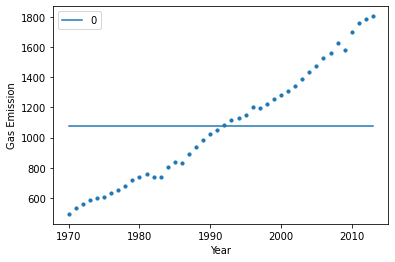

Root mean squared error:  2199.097660003817
R2 score:  0.985142249359373


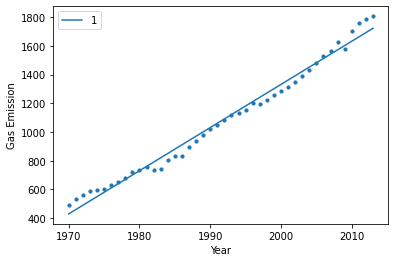

Root mean squared error:  608.3519500879319
R2 score:  0.9958897952826116


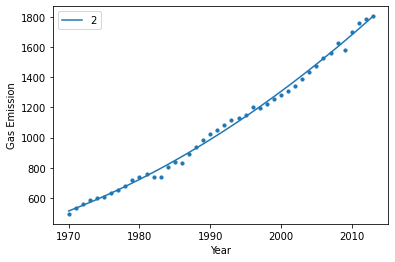

Root mean squared error:  599.0753663005887
R2 score:  0.995952470611323


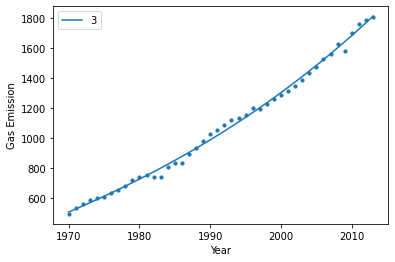

Root mean squared error:  598.9067863775936
R2 score:  0.9959536095868693


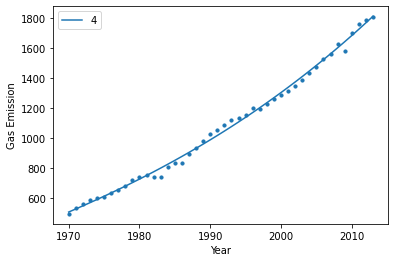

Root mean squared error:  598.7444382220751
R2 score:  0.9959547064587616


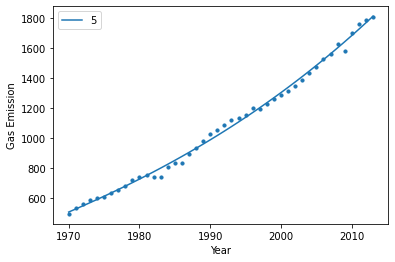

Root mean squared error:  598.5881025751622
R2 score:  0.9959557627083773


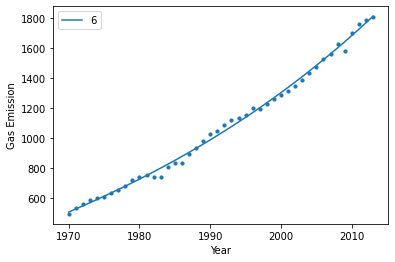

Root mean squared error:  598.4375597511844
R2 score:  0.9959567798199772


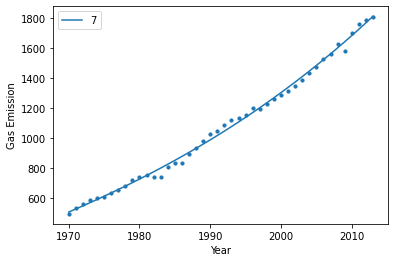

Root mean squared error:  598.292589465195
R2 score:  0.9959577592818714


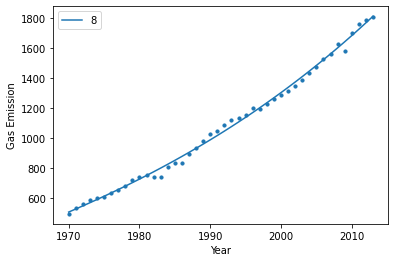

Root mean squared error:  598.1529706716613
R2 score:  0.9959587025875084


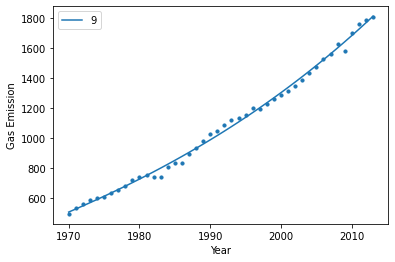

Root mean squared error:  598.0184816440975
R2 score:  0.9959596112349376


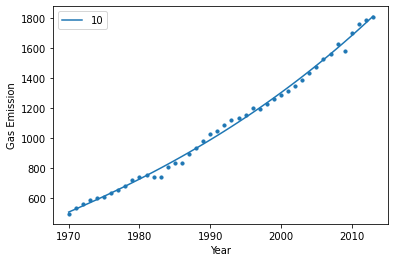

Root mean squared error:  597.8888999026599
R2 score:  0.9959604867272984


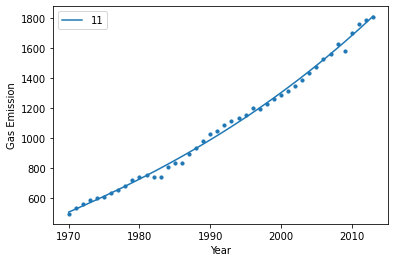

Root mean squared error:  597.7640021499342
R2 score:  0.9959613305732536


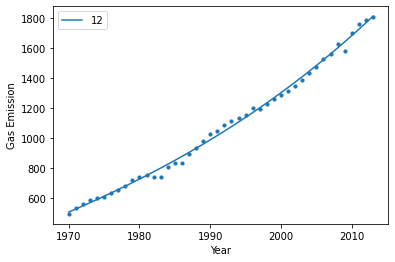

Root mean squared error:  597.6435642809561
R2 score:  0.9959621442869224


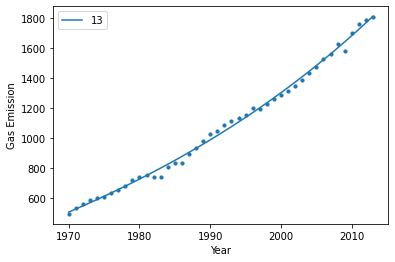

Root mean squared error:  597.5273613444789
R2 score:  0.9959629293881416


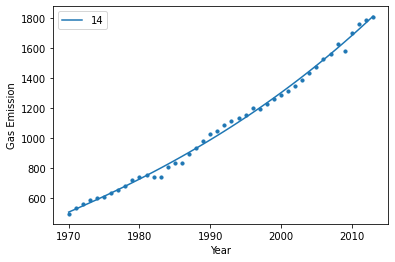

Root mean squared error:  597.4151675666515
R2 score:  0.9959636874023056


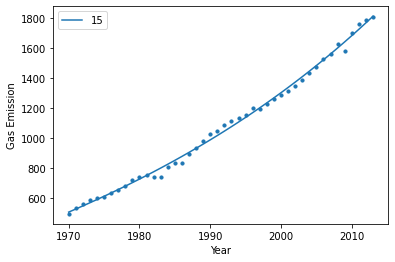

Root mean squared error:  597.3067562751711
R2 score:  0.9959644198608792


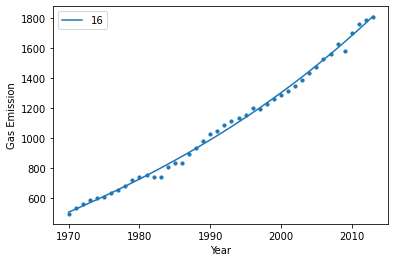

Root mean squared error:  597.2019000027541
R2 score:  0.9959651283006985


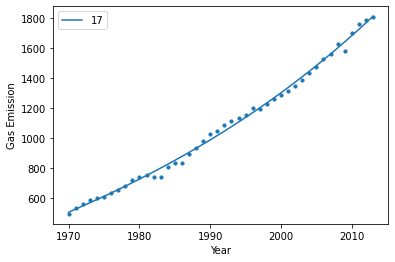

Root mean squared error:  597.1003703819074
R2 score:  0.9959658142646812


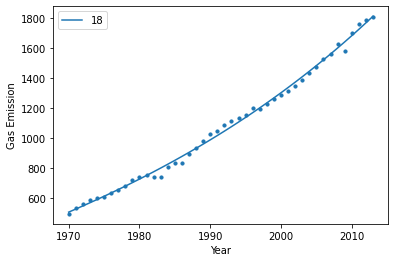

Root mean squared error:  597.0019382514245
R2 score:  0.9959664793011078


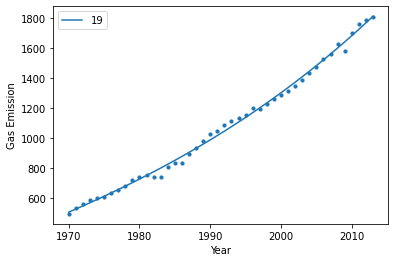

Root mean squared error:  596.9063736021453
R2 score:  0.9959671249639881


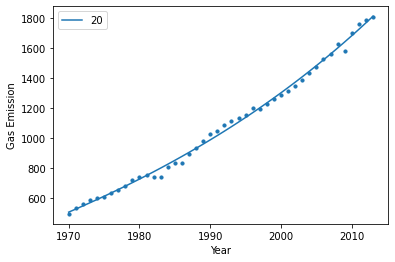

In [22]:
#training all models[GAS air pollution] for all values

for deg in range(0,21):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(pyear)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, pgas)
    y_predicted = regression_model.predict(X_poly)

    # model evaluation
    rmse = mean_squared_error(pgas, y_predicted)
    r2 = r2_score(pgas, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(pyear, pgas, s=10)
    plt.xlabel('Year')
    plt.ylabel('Gas Emission')
    # predicted values
    plt.plot(pyear, y_predicted, label = deg)
    plt.legend()
    plt.show()
    
#degree 3 best

In [23]:
#predicting total GAS pollution for the year 2014-2021


future = list(range(2014,2022))
future = np.array(future)
future = future.reshape(-1,1)

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(pyear)
regression_model = LinearRegression()
regression_model.fit(X_poly, pgas)
y_predicted = regression_model.predict(poly.fit_transform(future))

future = future.flatten()
GASCOMPONENT = {"Year" : future,"Total" : y_predicted}
df = pd.DataFrame(GASCOMPONENT)
df

,Year,Total
0,2014,1857.151728
1,2015,1902.416371
2,2016,1948.502254
3,2017,1995.420770
4,2018,2043.183312
5,2019,2091.801272
6,2020,2141.286044
7,2021,2191.649021


Root mean squared error:  138910.42355371898
R2 score:  -15.396216713983584


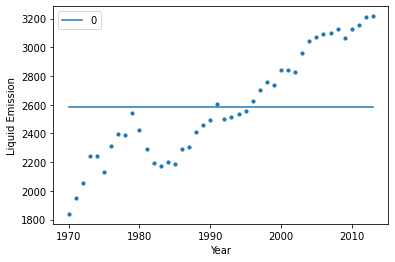

Root mean squared error:  13768.811634313792
R2 score:  -14.416408736106128


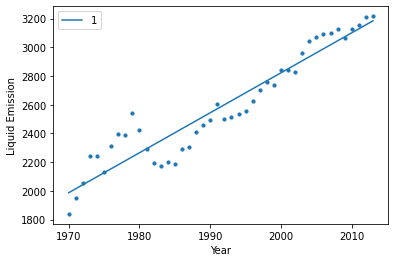

Root mean squared error:  11542.267700531438
R2 score:  -14.406021441744048


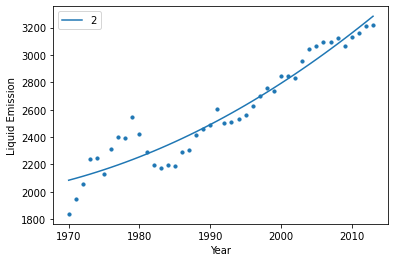

Root mean squared error:  11494.032205062938
R2 score:  -14.406061689695562


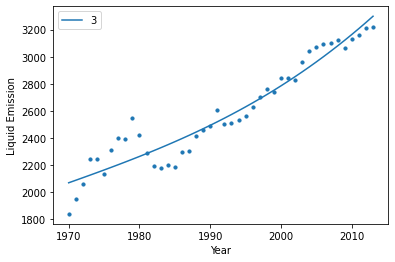

Root mean squared error:  11497.821987744004
R2 score:  -14.406044564637565


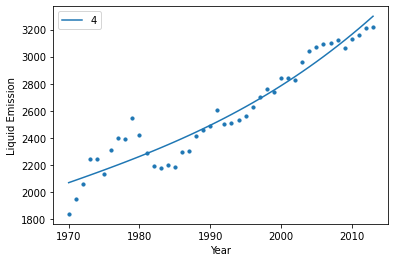

Root mean squared error:  11501.344646492724
R2 score:  -14.406029153455767


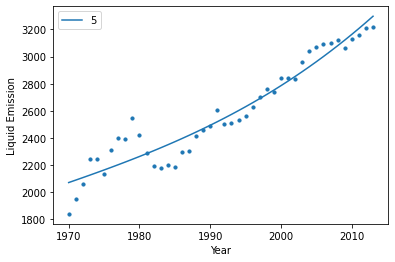

Root mean squared error:  11504.603604415604
R2 score:  -14.40601525945177


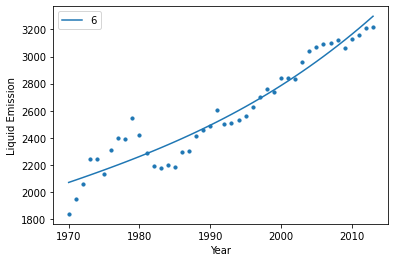

Root mean squared error:  11507.60231804013
R2 score:  -14.406002874602066


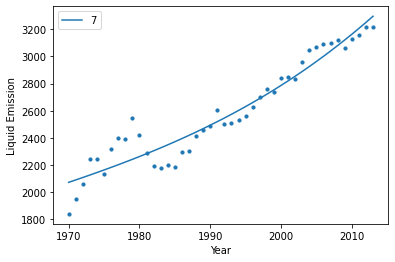

Root mean squared error:  11510.344274964313
R2 score:  -14.405991991121057


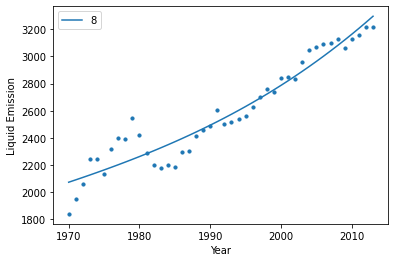

Root mean squared error:  11512.832991922005
R2 score:  -14.405982600665228


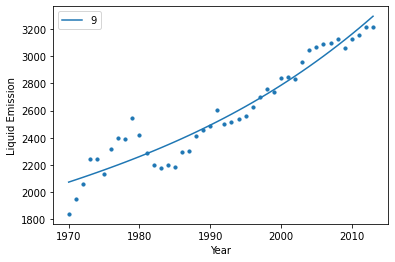

Root mean squared error:  11515.07201419967
R2 score:  -14.405974695521282


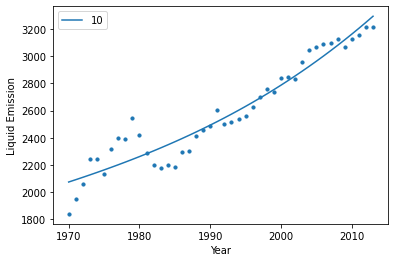

Root mean squared error:  11517.064913593022
R2 score:  -14.40596826648361


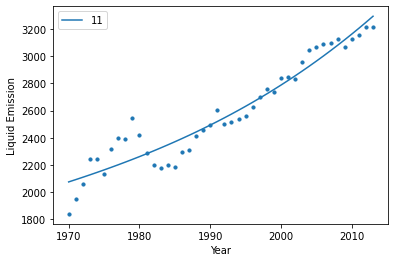

Root mean squared error:  11518.815287258785
R2 score:  -14.405963304774279


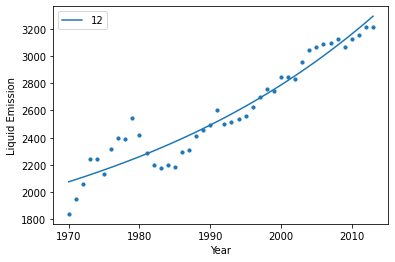

Root mean squared error:  11520.326756514747
R2 score:  -14.405959801471424


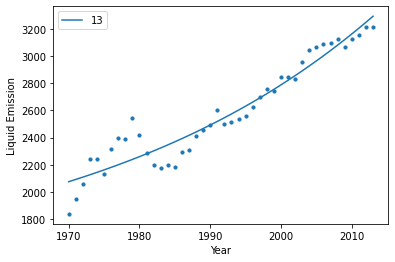

Root mean squared error:  11521.602965291708
R2 score:  -14.405957747099581


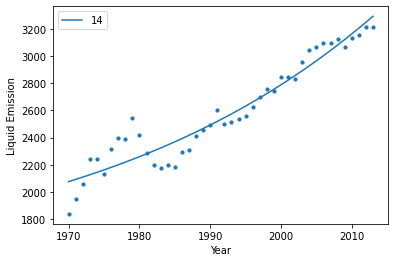

Root mean squared error:  11522.64757889183
R2 score:  -14.405957132134589


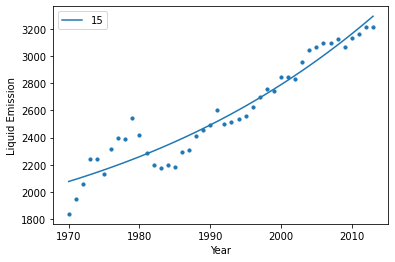

Root mean squared error:  11523.464282684981
R2 score:  -14.405957946677177


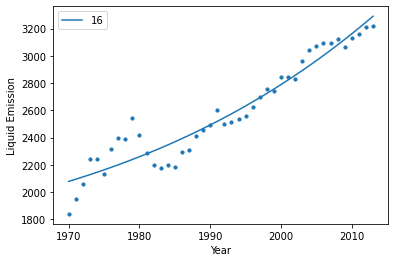

Root mean squared error:  11524.056780726743
R2 score:  -14.40596018068332


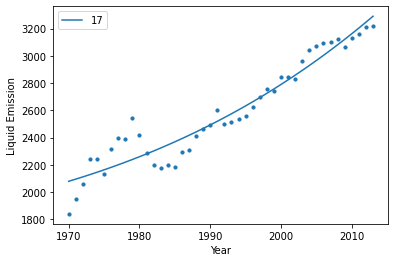

Root mean squared error:  11524.428794436071
R2 score:  -14.405963823882132


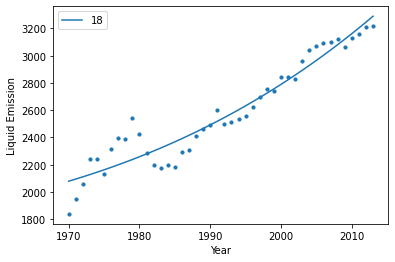

Root mean squared error:  11524.584061313783
R2 score:  -14.405968865688054


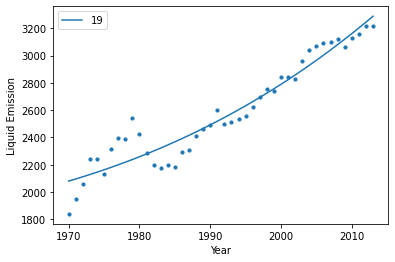

Root mean squared error:  11524.526333612384
R2 score:  -14.405975295351515


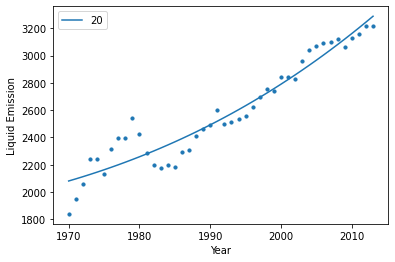

In [24]:
#training all models[LIQUID air pollution] for all values

for deg in range(0,21):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(pyear)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, pliquid)
    y_predicted = regression_model.predict(X_poly)

    # model evaluation
    rmse = mean_squared_error(pliquid, y_predicted)
    r2 = r2_score(pliquid, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(pyear, pliquid, s=10)
    plt.xlabel('Year')
    plt.ylabel('Liquid Emission')
    # predicted values
    plt.plot(pyear, y_predicted, label = deg)
    plt.legend()
    plt.show()
    
#degree 3 best

In [25]:
#predicting total LIQUID pollution for the year 2014-2021


future = list(range(2014,2022))
future = np.array(future)
future = future.reshape(-1,1)

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(pyear)
regression_model = LinearRegression()
regression_model.fit(X_poly, pliquid)
y_predicted = regression_model.predict(poly.fit_transform(future))

future = future.flatten()
LIQUIDCOMPONENT = {"Year" : future,"Total" : y_predicted}
df = pd.DataFrame(LIQUIDCOMPONENT)
df

,Year,Total
0,2014,3346.234638
1,2015,3394.769972
2,2016,3444.570576
3,2017,3495.662425
4,2018,3548.071495
5,2019,3601.823762
6,2020,3656.945200
7,2021,3713.461787


Root mean squared error:  499932.2169421487
R2 score:  0.0


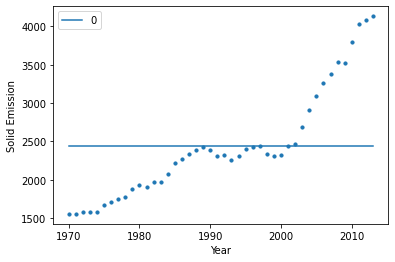

Root mean squared error:  74439.35166890906
R2 score:  0.8511011110181702


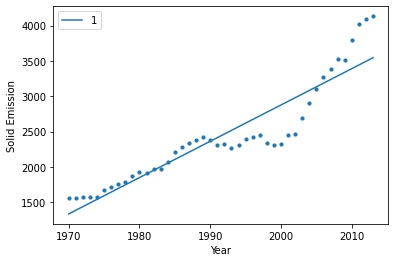

Root mean squared error:  42271.880584541505
R2 score:  0.915444776007638


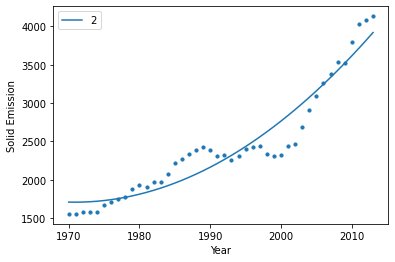

Root mean squared error:  16891.53271270666
R2 score:  0.9662123541146753


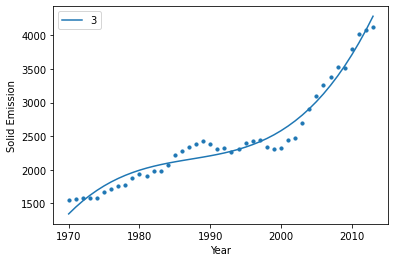

Root mean squared error:  16823.03567171025
R2 score:  0.9663493667709417


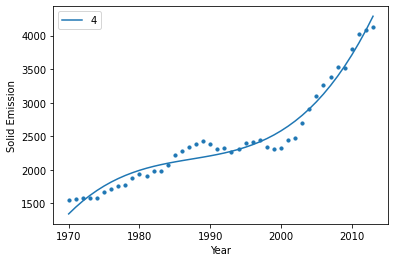

Root mean squared error:  16756.08057271608
R2 score:  0.9664832951250768


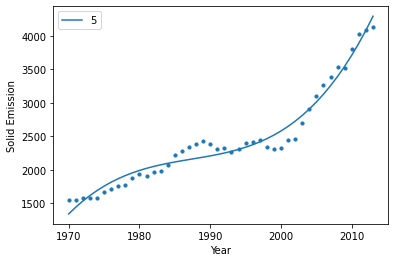

Root mean squared error:  16690.66002839521
R2 score:  0.9666141539537416


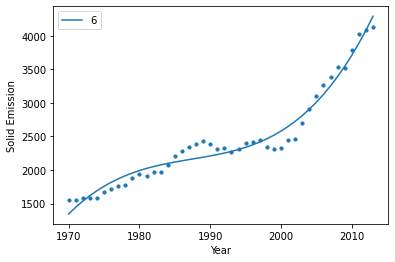

Root mean squared error:  16626.766617823487
R2 score:  0.9667419581007969


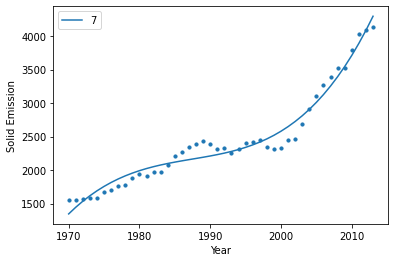

Root mean squared error:  16564.392857325463
R2 score:  0.9668667225356228


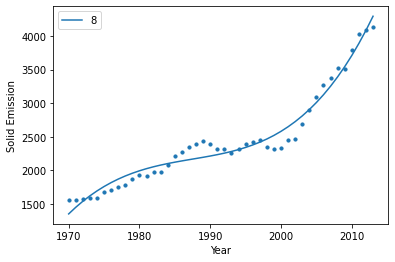

Root mean squared error:  16503.531261660693
R2 score:  0.9669884622307299


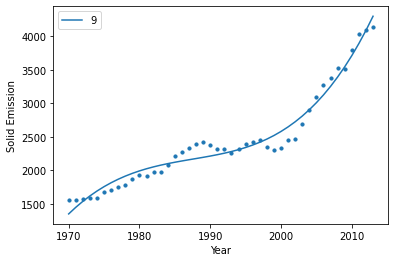

Root mean squared error:  16444.174278504004
R2 score:  0.9671071922928166


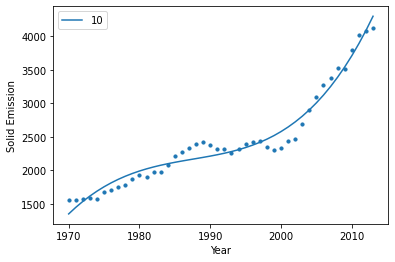

Root mean squared error:  16386.314335527783
R2 score:  0.9672229278685914


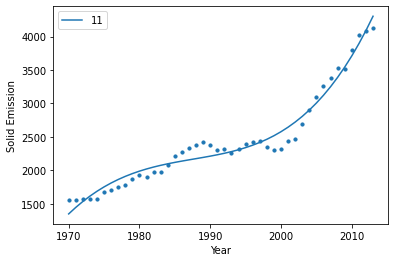

Root mean squared error:  16329.943806609348
R2 score:  0.9673356842123679


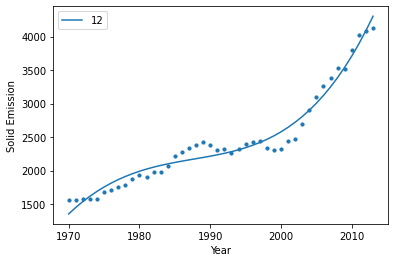

Root mean squared error:  16275.055046122556
R2 score:  0.9674454766174714


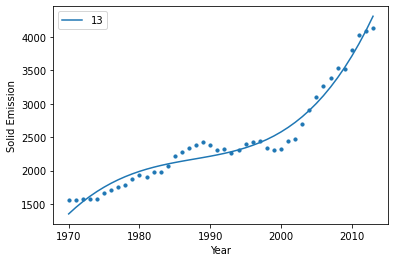

Root mean squared error:  16221.640371592832
R2 score:  0.9675523204509343


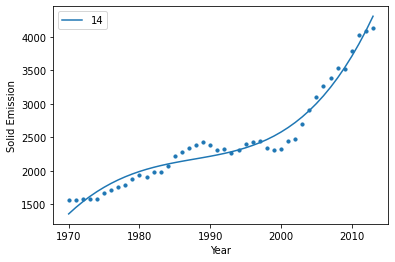

Root mean squared error:  16169.692062612634
R2 score:  0.9676562311556653


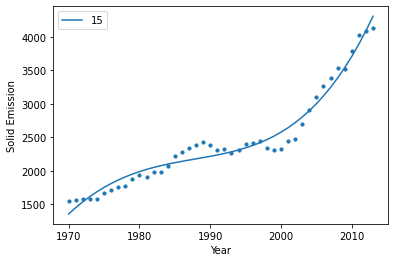

Root mean squared error:  16119.202373177364
R2 score:  0.9677572242257741


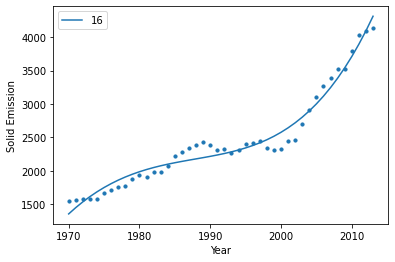

Root mean squared error:  16070.163518261283
R2 score:  0.9678553152334232


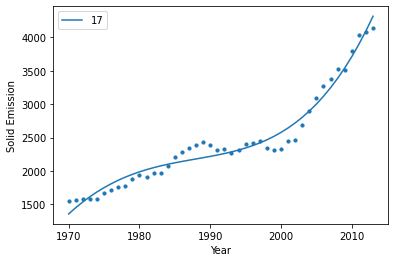

Root mean squared error:  16022.56768761876
R2 score:  0.9679505198012216


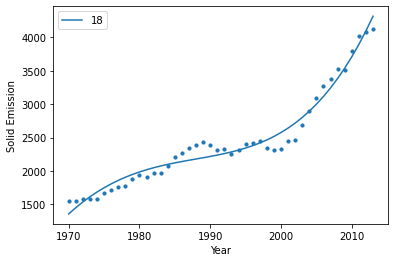

Root mean squared error:  15976.407040207356
R2 score:  0.9680428536133807


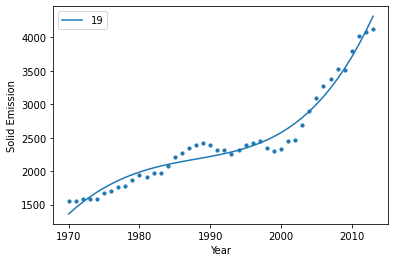

Root mean squared error:  15931.673707458032
R2 score:  0.9681323324091722


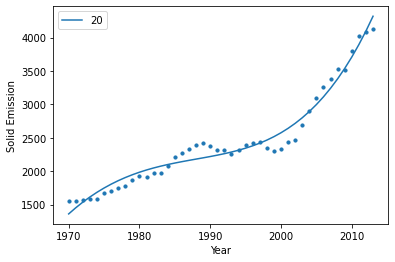

In [26]:
#training all models[SOLID air pollution] for all values

for deg in range(0,21):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(pyear)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, psolid)
    y_predicted = regression_model.predict(X_poly)

    # model evaluation
    rmse = mean_squared_error(psolid, y_predicted)
    r2 = r2_score(psolid, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(pyear, psolid, s=10)
    plt.xlabel('Year')
    plt.ylabel('Solid Emission')
    # predicted values
    plt.plot(pyear, y_predicted, label = deg)
    plt.legend()
    plt.show()
    
#degree 5 best

In [27]:
#predicting total SOLID pollution for the year 2014-2021


future = list(range(2014,2022))
future = np.array(future)
future = future.reshape(-1,1)

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(pyear)
regression_model = LinearRegression()
regression_model.fit(X_poly, psolid)
y_predicted = regression_model.predict(poly.fit_transform(future))

future = future.flatten()
SOLIDCOMPONENT = {"Year" : future,"Total" : y_predicted}
df = pd.DataFrame(SOLIDCOMPONENT)
df

,Year,Total
0,2014,4514.238650
1,2015,4754.254188
2,2016,5011.235313
3,2017,5285.822939
4,2018,5578.659809
5,2019,5890.390505
6,2020,6221.661443
7,2021,6573.120877


In [30]:
print(pyear)
print(len(fullDate))

[[1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]]
52


In [37]:
print(fullDate)
npassed = fullDate[:-8] #to be used to train
tpassed = fullDate[-8:] #predicted to be compared with this

[362, 353, 344, 329, 330, 333, 320, 314, 310, 301, 308, 314, 318, 317, 310, 307, 302, 295, 288, 283, 283, 282, 285, 284, 282, 276, 275, 271, 271, 271, 266, 264, 261, 251, 244, 236, 230, 225, 226, 229, 218, 215, 216, 214, 215, 216, 217, 212, 209, 209, 234, 209]


In [38]:
#TOTAL POLLUTION WITH DAYS PASSED => FINAL AIM IS TO CHECK FOR ALL 4 THAT IS TOTAL GAS SOLID LIQUID AND THEN
#SEE WHICH ONE MATCHES THE MOST WITH GIVEN OVERSHOOT DAY VALUES FOR THE YEARS 2014-2021
#WHICHEVER PERFORMS BEST, USING THAT MODEL TO PREDICT NEXT 5 YEAR OVERSHOOT VALUES

ntotal = np.array(ptot).reshape(-1,1)
nsolid = np.array(psolid).reshape(-1,1)
ngas = np.array(pgas).reshape(-1,1)
nliquid = np.array(pliquid).reshape(-1,1)

future = list(range(2014,2022))
future = np.array(future)
future = future.reshape(-1,1)

ttotal = np.array(TOTAL['Total']).reshape(-1,1)
tsolid = np.array(SOLIDCOMPONENT['Total']).reshape(-1,1)
tgas = np.array(GASCOMPONENT['Total']).reshape(-1,1)
tliquid = np.array(LIQUIDCOMPONENT['Total']).reshape(-1,1)

[[3346.2346379 ]
 [3394.76997197]
 [3444.57057576]
 [3495.6624249 ]
 [3548.07149499]
 [3601.82376163]
 [3656.94520045]
 [3713.46178696]]


Root mean squared error:  4547.836776859505
R2 score:  -74.34598853714945


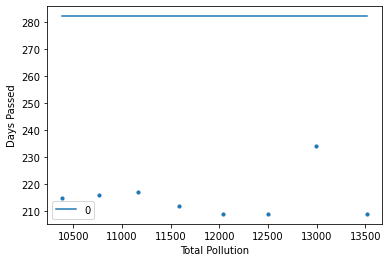

Root mean squared error:  5620.067597890326
R2 score:  -92.1101025795964


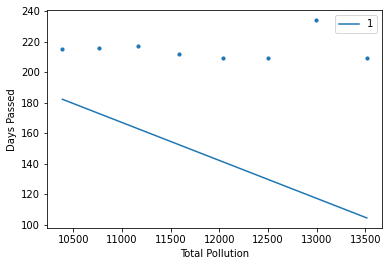

Root mean squared error:  91.5193872451143
R2 score:  -0.5162414661370218


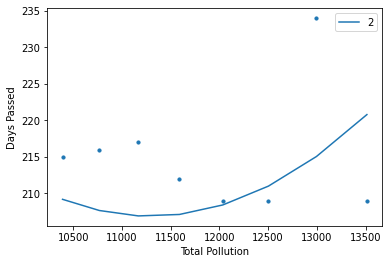

Root mean squared error:  408.66102053938704
R2 score:  -5.770464746187101


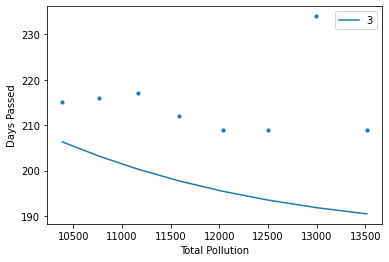

Root mean squared error:  32425.490658338378
R2 score:  -536.2071970317515


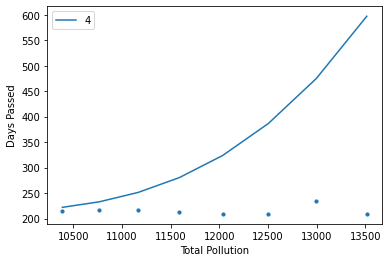

Root mean squared error:  113974.35778368985
R2 score:  -1887.262722794758


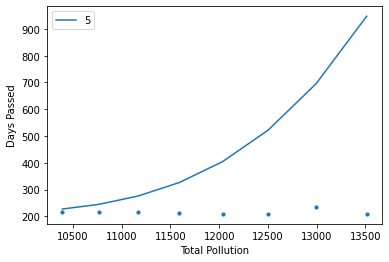

Root mean squared error:  474644.11134560715
R2 score:  -7862.63529021974


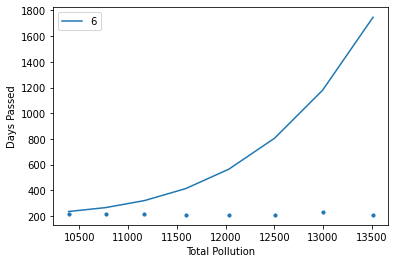

Root mean squared error:  2233531.0069200657
R2 score:  -37002.87896528196


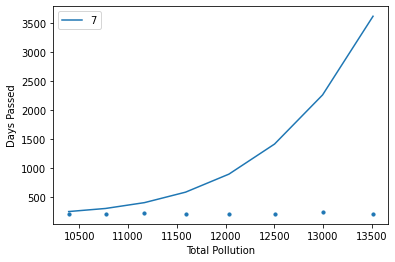

Root mean squared error:  10615632.351720633
R2 score:  -175872.7951100493


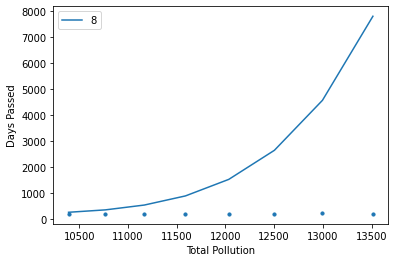

Root mean squared error:  47678958.761780776
R2 score:  -789917.0328123142


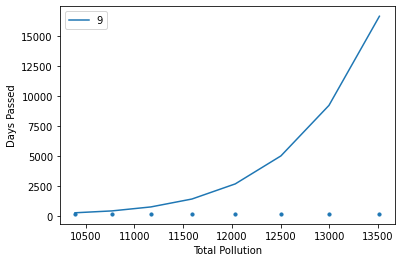

Root mean squared error:  200638261.72142398
R2 score:  -3324060.286609147


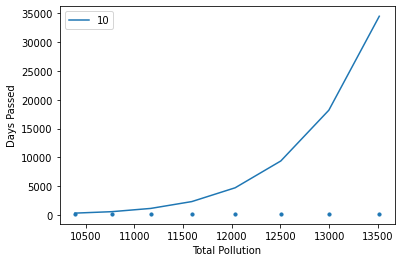

Root mean squared error:  805924878.3363008
R2 score:  -13352106.743599081


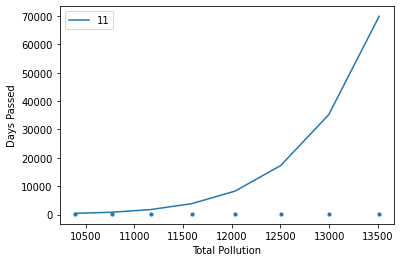

Root mean squared error:  3137418883.6383905
R2 score:  -51978981.2813505


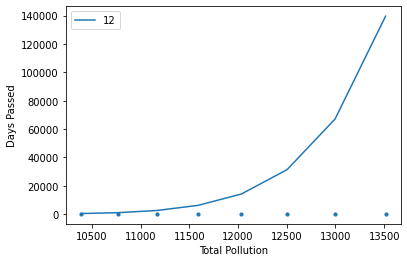

Root mean squared error:  11900509661.653864
R2 score:  -197160914.95802414


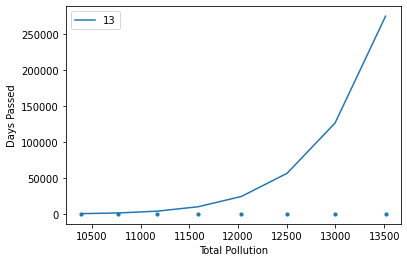

Root mean squared error:  43425799302.53592
R2 score:  -719454090.4735435


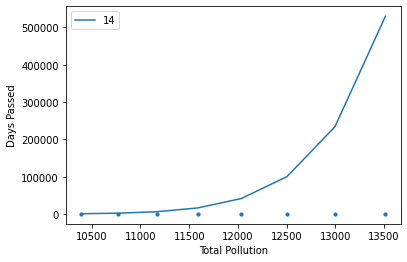

Root mean squared error:  153887939290.31503
R2 score:  -2549528374.5061255


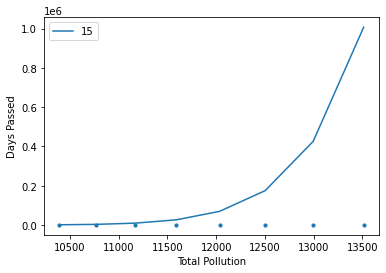

Root mean squared error:  513865491617.68604
R2 score:  -8513432943.222601


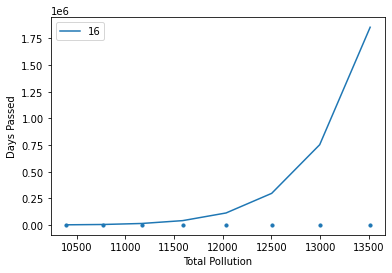

Root mean squared error:  147972744840.28583
R2 score:  -2451528777.094303


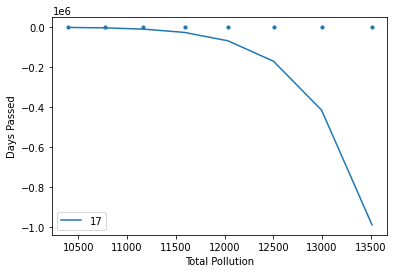

Root mean squared error:  333423169650.9796
R2 score:  -5523966568.418249


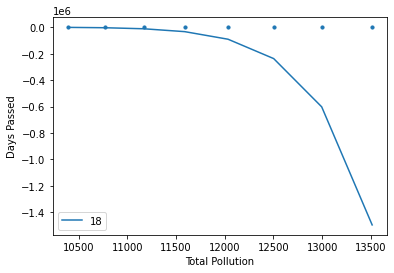

Root mean squared error:  752909178357.6215
R2 score:  -12473773598.50499


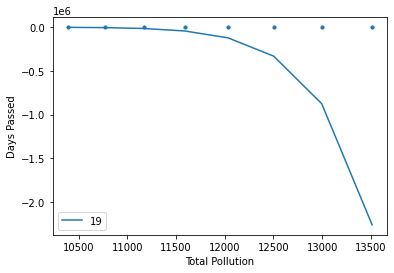

Root mean squared error:  1711315290291.8164
R2 score:  -28352104212.998512


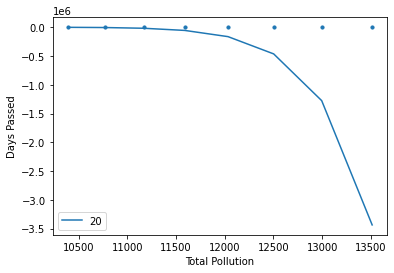

In [39]:
#training all models[TOTAL pollution  TO  Overshoot] for all values

for deg in range(0,21):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(ntotal)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, npassed)
    y_predicted = regression_model.predict(poly.fit_transform(ttotal))

    # model evaluation
    rmse = mean_squared_error(tpassed, y_predicted)
    r2 = r2_score(tpassed, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(ttotal, tpassed, s=10)
    plt.xlabel('Total Pollution')
    plt.ylabel('Days Passed')
    # predicted values
    plt.plot(ttotal, y_predicted, label = deg)
    plt.legend()
    plt.show()
    
#degree 2 best but use degree 3

Root mean squared error:  4547.836776859505
R2 score:  -74.34598853714945


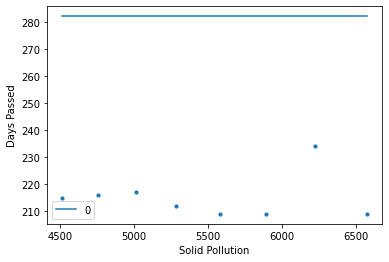

Root mean squared error:  9913.250121957448
R2 score:  -163.237123428754


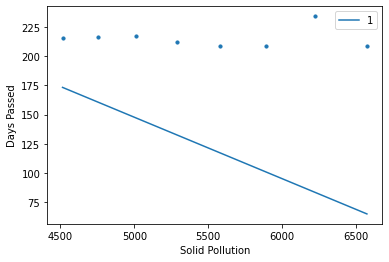

Root mean squared error:  1502.715305698431
R2 score:  -23.896137604115864


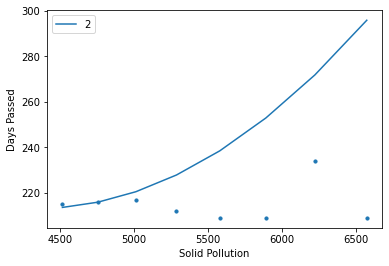

Root mean squared error:  9374.749752232809
R2 score:  -154.31555375172138


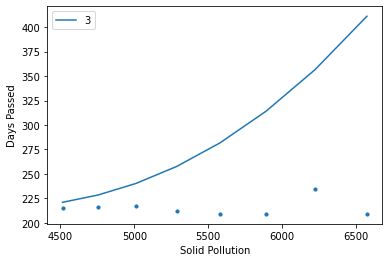

Root mean squared error:  219.9175840656236
R2 score:  -2.643470199378698


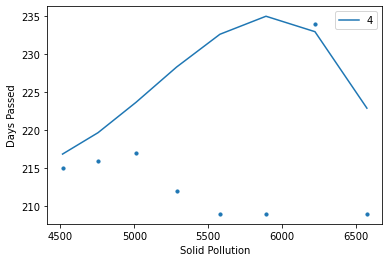

Root mean squared error:  134037.6219216367
R2 score:  -2219.6595399908742


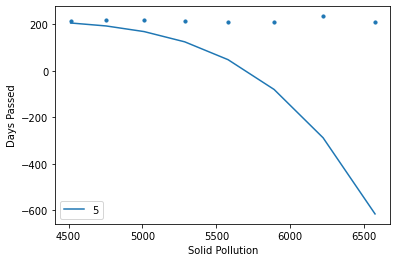

Root mean squared error:  498980.071603627
R2 score:  -8265.819721105909


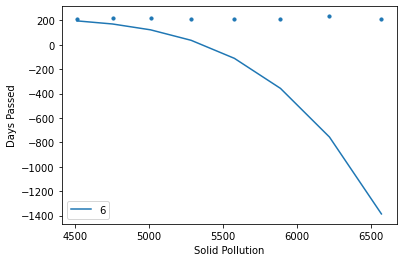

Root mean squared error:  304935.5084688383
R2 score:  -5050.99910484226


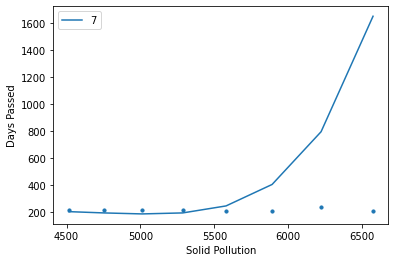

Root mean squared error:  72034364.64761585
R2 score:  -1193423.6278662735


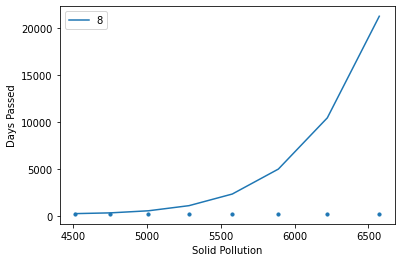

Root mean squared error:  1424199538.1173434
R2 score:  -23595331.75679782


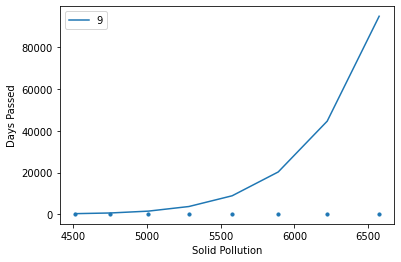

Root mean squared error:  16140980511.363314
R2 score:  -267414638.58769146


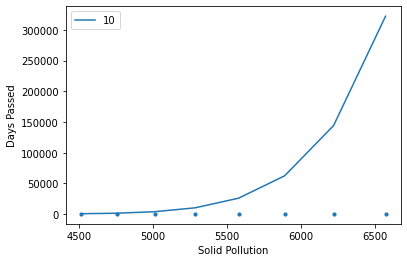

Root mean squared error:  137918236115.193
R2 score:  -2284951360.9912896


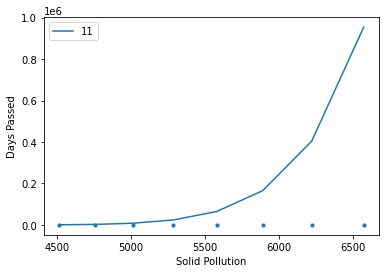

Root mean squared error:  963125677483.5907
R2 score:  -15956521707.244837


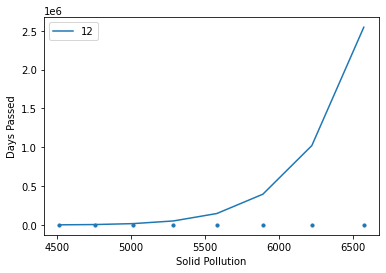

Root mean squared error:  5615747509725.597
R2 score:  -93038529800.30421


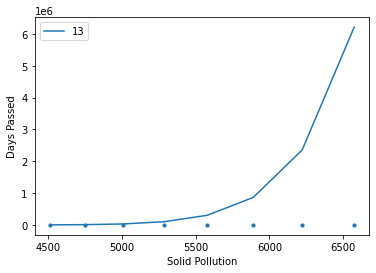

Root mean squared error:  27472860701123.395
R2 score:  -455154823936.8455


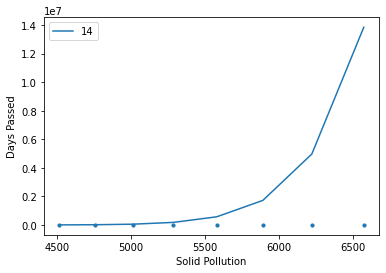

Root mean squared error:  114122293379156.38
R2 score:  -1890713636102.0308


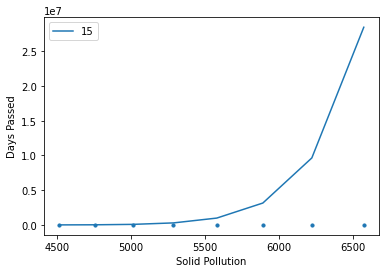

Root mean squared error:  414208088658072.1
R2 score:  -6862365434665.481


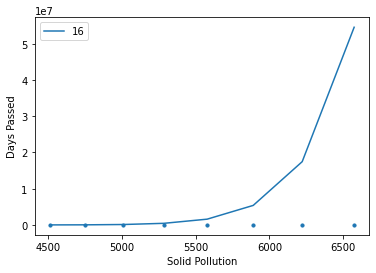

Root mean squared error:  1368311172121113.2
R2 score:  -22669405906225.055


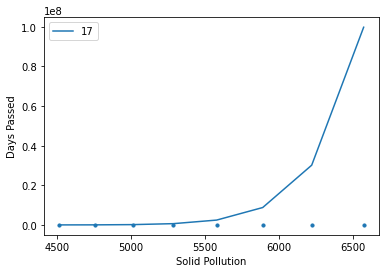

Root mean squared error:  4290591103083286.5
R2 score:  -71084087651391.78


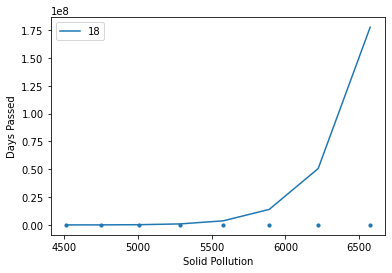

Root mean squared error:  1.3183030422463476e+16
R2 score:  -218408994832425.22


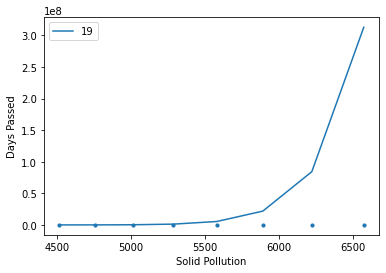

Root mean squared error:  4.057011654826371e+16
R2 score:  -672142754100148.5


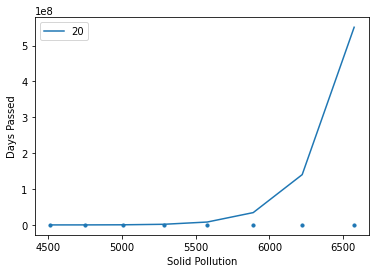

In [40]:
#training all models[SOLID pollution  TO  Overshoot] for all values

for deg in range(0,21):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(nsolid)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, npassed)
    y_predicted = regression_model.predict(poly.fit_transform(tsolid))

    # model evaluation
    rmse = mean_squared_error(tpassed, y_predicted)
    r2 = r2_score(tpassed, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(tsolid, tpassed, s=10)
    plt.xlabel('Solid Pollution')
    plt.ylabel('Days Passed')
    # predicted values
    plt.plot(tsolid, y_predicted, label = deg)
    plt.legend()
    plt.show()
    
#degree 4 best and use 4

In [ ]:
#LIQUID AND GAS TO OVERSHOOT PENDING then choose the best ones and try to match the results with previous results